## Final Project Submission

Please fill out:
* Student name: Gabriel Mendoza Reyes


Information about the dataset and related issues:

Dataset:
    - King County - North East County including Seattle on the boarder with Canada in the state of Washington.
    - It includes homes sold between May 2014 and May 2015.
    
Goal:
    - Predict the house
    
Columns:

    - id: Unique numeric number
    - date: Date house was sold out
    - price: Target value: price of the house sold
    - bedrooms: Number of bedrooms in the house
    - bathrooms: Number of bathrooms in the house
    - sqft_living: Measurement of house in square foot
    - sqft_lot: Measurement of the lot in sqft
    - floors: Number of levels of the house
    - waterfront: House has a view to waterfront 0=No, 1=Yes
    - view: Determines if a house has been viewed or not 0=No, 1=yes
    - condition: Overall condition of the house on a scale 1 to 5
    - grade: Overall grade given to the housing unis, based on King county grading system on a scale of 1 to 11
    - sqft_above: Sqft of house apart from basement
    - sqft_basement: Sqft footage fo the basement 
    - yr_built: Date of building the house
    - yr_renovated: Year of renovation of the house
    - zipcode: Zip code of the location of the house
    - lat: Lattidue of the location of the house
    - long: Longitude of the location of the house
    - sqft_living15: Living room area in 2015(implies-- some renovations)
    - sqft_lot15: Lot size area in 2015(implies -- some renovations)
    https://www.academia.edu/38170218/Analyze_House_Price_for_King_County_copy.docx
    
Splitting the dataset into train- and testset:
    - Splitting method will be discussed further into the exercise among all students.
    
    
## Business Cases:
    - We are given a collection of information on the houses sold in the past in King County. Our task is to create a model which is able to predict future price of other houses. We are expected to deliver a model with an accuracy measured in r2-score in the range of 0.7 to 0.9.
    - Come up with three business strategies to maximize the price of a house beeing sold

# Data mining
The dataset is given to as in the form of a csv file. So data mining is pretty straight forward.

In [3]:
# import pandas for data cleaning and manipulation
import pandas as pd
# import seaborn and matplotlib.pyplot for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodel for linear regression modeling
#import statsmodels.api as sms

In [4]:
df = pd.read_csv('./King_County_House_prices_dataset.csv')
df_raw = pd.read_csv('./King_County_House_prices_dataset.csv')

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Data cleaning
To Do:
    - Missing Values:
        - Get an overview of how many missing values as in each feature
        - Find the best strategy on how to deal with each column
    - All feature have the correct data type
    - Transform categorical features appropriatly
    - Drop columns with no information
    - Investigate outliers
    

To transform:
    - date from object to datetime √
    - price from float to int √
    - bathrooms float to int √
    - floors float to int √
    - waterfront float to int √
    - view float to int - further investigation necessary
    - sqft_basement object to int √
    - yr_renovated float to int √

## Missing Data

In [4]:
# Creating a table to get an overview of the missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = total / df.shape[0] * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
yr_renovated,3842,17.789508
waterfront,2376,11.001528
view,63,0.291707
sqft_lot15,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


Most of the features have no missing values. Only view, waterfront and yr_renovated have some missing values. Yr_renovated and waterfront have a significant precentage of missing values so further investigation are necessary. In the case of view I will replace missing values with the median.

### yr_renovated

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't wor

78.7655692920313


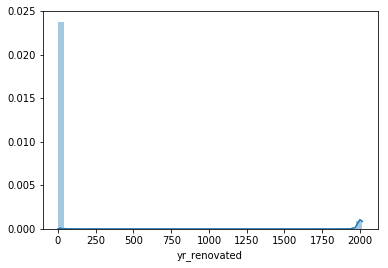

In [5]:
sns.distplot(df['yr_renovated']);
# get percentage of not renovated houses:
precent_not_renovated =(df[df['yr_renovated'] == 0].shape[0] / df.shape[0]) * 100
print(precent_not_renovated)

78% of house have not been renovated according to the dataset. This value seems unreasonable high. 

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


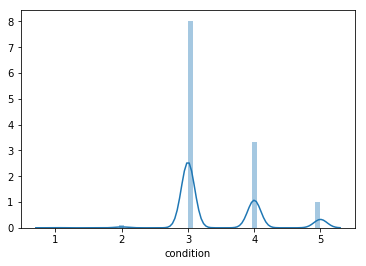

In [6]:
#Filter df for only zeros in yr_renovated
sns.distplot(df[df['yr_renovated'] == 0]['condition']);

No house with a zero in yr_renovated have a condition of higher than 6. Most of them have condition 3 which amount to "Falls short of minimum building standards. Normally cabin or inferior structure." Grade 4 and 5 mean the following: - Grade 4 Generally older low quality construction. Does not meet code. Grade 5 Lower construction costs and workmanship. Small, simple design. 
This implies that houses with a zero in yr_revovated have general bad condition. So assuming that those entries are in fact correct is valid. This argument speaks against droping the feature. General understanding of the matter implies that a renovation of a house in general might have a significant importance on the house price. 

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


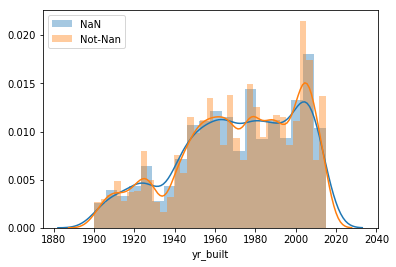

In [7]:
yr_renovated_df = df[df['yr_renovated'].isnull()]
sns.distplot(yr_renovated_df['yr_built'], label='NaN');
sns.distplot(df['yr_built'], label='Not-Nan');
plt.legend();

Comparision of this distribution between Nan and non-nan entry regarding the yr_renovated indicated that there is no significant difference. The Thesis that nan entries are mostly modern house that have no need to be renovated is invalid.

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


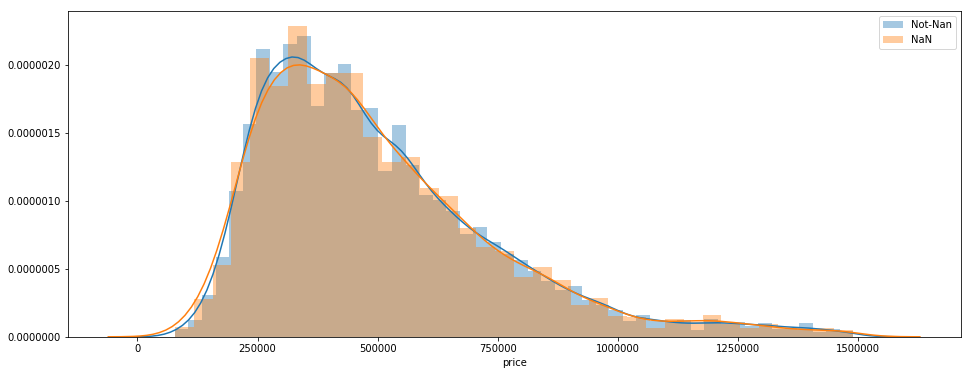

In [8]:
plt.figure(figsize=(16, 6))
cutting_threshold = 1500000
cut_price_df = df[df['price'] < cutting_threshold]
cut_price_yr_renovated = yr_renovated_df[yr_renovated_df['price'] < cutting_threshold]
sns.distplot(cut_price_df['price'], label='Not-Nan', );
sns.distplot(cut_price_yr_renovated['price'], label='NaN');
plt.legend();

Distribution comparing the prices of nans and non nans is also pretty similar. The thesis that entries with nans are cheap houses which actually have never been renovated is not valid.

#### Create alternative Variable for yr_renovated
Maybe there is a common value for the when most houses are renovated in relation to the yr_built. If there is such a dominating value I will replace yr_build with this value.

56.473118279569896
54.0


/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


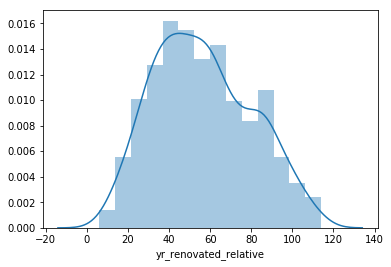

In [9]:
# Filter zeros and nan
df_alt = df[df['yr_renovated'] != 0]
df_alt = df_alt[df_alt['yr_renovated'].notnull()]
df_alt['yr_renovated_relative'] = df_alt['yr_renovated'] - df_alt['yr_built']
sns.distplot(df_alt['yr_renovated_relative']);
yr_renovated_mean = df_alt['yr_renovated_relative'].mean()
print(yr_renovated_mean)
print(df_alt['yr_renovated_relative'].median())

#### Conclusion on the feature yr_renevated
Generall understand implies that this is an important feature in predicting house prices. The high number of zeros coincides with the condition of the house. The distribution of the sum of yr_build and yr_renovated is normal distributed. Mean and median are also pretty close to each other. 
Therefor I will calculate a yr_build the missing values based on this formula:
yr_renovated = yr_build + mean( yr_renovated - yr_build)
This will create entries where the yr_renovated will be in the future, but that will not impact the linearity. 
All entries with zero will be replaces with yr_build. 


In [10]:
# Replace all NaNs in yr_renovated with calculated value
#yr_ren_null = df['yr_renovated'].isnull()
yr_ren_zero = df['yr_renovated'] == 0
# This replacement strategie is not being used. See markdown for explanation.
#df['yr_renovated'][yr_ren_null] = df['yr_built'][yr_ren_null] + int(yr_renovated_mean)
# Replace all zeros with yr_built
#df['yr_renovated'][yr_ren_zero] = df['yr_built'][yr_ren_zero] 
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'] = df['yr_renovated'].astype(int)

### Final check: Compare statistical significance of old and new yr_renovated


In [11]:
# Manipulated feature
X = df[['yr_renovated']]
X = sms.add_constant(X)
y = df[['price']]

# Create an OLS model
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     304.2
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.18e-67
Time:                        19:20:53   Log-Likelihood:            -3.0724e+05
No. Observations:               21597   AIC:                         6.145e+05
Df Residuals:                   21595   BIC:                         6.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.321e+05   2526.327    210.629      0.000    5.27e+05    5.37e+05
yr_renovated   118.9335      6.819     17.441      0.000     105.567     132.300
==============================================================================
Omnibus:                    18903.836   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076824.310
Skew:                           3.969   Prob(JB):                         0.00
Kurtosis:                      36.670   Cond. No.                         377.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Original feature
df_raw['yr_renovated'].fillna(0, inplace=True)
X = df_raw[['yr_renovated']]
X = sms.add_constant(X)
y = df_raw[['price']]


# Create an OLS model
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     304.2
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.18e-67
Time:                        19:20:53   Log-Likelihood:            -3.0724e+05
No. Observations:               21597   AIC:                         6.145e+05
Df Residuals:                   21595   BIC:                         6.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.321e+05   2526.327    210.629      0.000    5.27e+05    5.37e+05
yr_renovated   118.9335      6.819     17.441      0.000     105.567     132.300
==============================================================================
Omnibus:                    18903.836   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076824.310
Skew:                           3.969   Prob(JB):                         0.00
Kurtosis:                      36.670   Cond. No.                         377.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing the result of the manipulated yr_renovated feature shows that the calculated yr_renovated is not improving the result. Therefore the following strategie regarding yr_renovated is used:
## - replace NaN values with Zeros

### missing values in waterfront

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


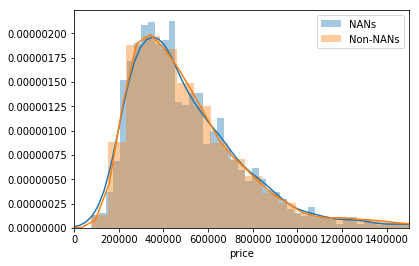

In [13]:
sns.distplot(df[df['waterfront'].isnull()]['price'], label='NANs', bins=100)
sns.distplot(df[~df['waterfront'].isnull()]['price'], label='Non-NANs', bins=100)
plt.xlim([0,1500000])
plt.legend();

Both distribution look pretty similar. A mayor difference can not be found. 
Three methods will be compared with each other:
    - Replace waterfront nans with Zeros
    - Drop waterfront nans

In [14]:
# Replace waterfront nans with zeros
df_1 = df
df_1['waterfront'].fillna(0, inplace=True)


In [15]:
# Drop waterfront nan rows
df_2 = df_raw
df_2 = df_2.dropna(axis=0,subset=['waterfront'])
diff_nan = df.shape[0] - df_2.shape[0] 

#### Compare both methods:


In [16]:
# Fillna(0)
X = df_1[['waterfront']]
X = sms.add_constant(X)
y = df[['price']]

# Create an OLS model
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1622.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:20:54   Log-Likelihood:            -3.0661e+05
No. Observations:               21597   AIC:                         6.132e+05
Df Residuals:                   21595   BIC:                         6.132e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.323e+05   2419.148    220.030      0.000    5.28e+05    5.37e+05
waterfront  1.185e+06   2.94e+04     40.273      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    17707.435   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           909716.460
Skew:                           3.601   Prob(JB):                         0.00
Kurtosis:                      33.969   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# dropna
X = df_2[['waterfront']]
X = sms.add_constant(X)
y = df_2[['price']]

# Create an OLS model
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:20:54   Log-Likelihood:            -2.7306e+05
No. Observations:               19221   AIC:                         5.461e+05
Df Residuals:                   19219   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.326e+05   2590.404    205.621      0.000    5.28e+05    5.38e+05
waterfront  1.185e+06   2.97e+04     39.855      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16093.329   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894387.382
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.591   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion on waterfront feature:
The difference in modelling with both methods is not significant. Since fillna has the advantage of keeping more information from other potentially interessing features, I prefer this method over droping nan values.

### missing values in view:
Since the percentage in missing values in view is only 0.29 percent the method of transforming the nans will not be significant. Therefor I choose to fillna values with zeors.

In [18]:
df['view'] = df['view'].fillna(0)

### Changing dtype of date and price

In [19]:
df['date'] = pd.to_datetime(df['date'])
df.astype({'price': 'int'}).dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### bathrooms
Best method to fix missing values in the waterfront feature would be a map supported approach. Because of time contrains this is not possible. Because of the large number of nan entries in waterfront further investigations still are necessary:
    - compare distribution of nan entries and non-nan based on:
        - price - do both groups have similar price distribution

In [20]:
df.groupby('bathrooms')['id'].nunique()

bathrooms
0.50       4
0.75      70
1.00    3794
1.25       9
1.50    1429
1.75    3020
2.00    1913
2.25    2031
2.50    5352
2.75    1182
3.00     747
3.25     586
3.50     729
3.75     155
4.00     134
4.25      79
4.50      99
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: id, dtype: int64

Since there are many entries with non int bathrooms I assuming a system. So I will leave this column as an int.

### floors

In [21]:
df.groupby('floors')['id'].nunique()

floors
1.0    10552
1.5     1888
2.0     8203
2.5      161
3.0      609
3.5        7
Name: id, dtype: int64

Half floor like 1.5 where the master bedroom is on another floor are valid entries. No need to convert them to integers.

### waterfront

In [22]:
df.groupby('waterfront')['id'].nunique()

waterfront
0.0    21274
1.0      146
Name: id, dtype: int64

Only 0.0 and 1.0 present. This is a cathegorical variable. Since the are only two option transforming it to int is sufficend. 

In [23]:
df['waterfront'] = df['waterfront'].astype(int)

### view

In [24]:
df.groupby('view')['id'].nunique()
#df['view'] = df['view'].astype(int)


view
0.0    19316
1.0      329
2.0      956
3.0      505
4.0      314
Name: id, dtype: int64

According to the column describtion view determines if an object has been view or not. That would one allow for 0 and ones to show up. <font color='red'>Since the is a large number of values higher than one, its need to be futher investigated.</font>

### sqft_basement

In [25]:
df['sqft_basement'] = df['sqft_basement'].replace('?', 0)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df['sqft_basement'] = df['sqft_basement'].astype(int)
df['sqft_basement'].isnull().sum()

0

### yr_built

In [26]:
df['yr_built'] = df['yr_built'].astype(int)

# Feature Engineering
    - Ideas:
        - Create calculated features based on dif between sqft_living15 - sqft_living, and sqft_lot15 and sqft_lot
        

## Transforming categorical variables 

waterfront and view are categrorical variables but they only range form zero to one so no dummy variables are necessary.


### condition

In [27]:
condition_dummies = pd.get_dummies(df['condition'], drop_first=True, prefix='con_')
df = df.join(condition_dummies)
df = df.drop(columns='condition')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,con__2,con__3,con__4,con__5
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,0,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,1991,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,...,0,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,0,98136,47.5208,-122.393,1360,5000,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,0,98074,47.6168,-122.045,1800,7503,0,1,0,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0.0,...,0,98053,47.6561,-122.005,4760,101930,0,1,0,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0.0,...,0,98003,47.3097,-122.327,2238,6819,0,1,0,0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0.0,...,0,98198,47.4095,-122.315,1650,9711,0,1,0,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0.0,...,0,98146,47.5123,-122.337,1780,8113,0,1,0,0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0.0,...,0,98038,47.3684,-122.031,2390,7570,0,1,0,0


### grade
Running model fit with dummy variables for the grade shows that the outcome is worse than using the continious variable. Therefor I will not transfer this variable.

In [28]:
#grade_dummies = pd.get_dummies(df['grade'], drop_first=True, prefix='grade')
#df = df.join(grade_dummies)
#df = df.drop(columns='grade')

### yr_renovated


In [29]:
# create a dummy for if the house was ever renocated
df['was_renovated'] = 0
df.loc[df['yr_renovated'] == 0, 'was_renovated'] = 1
# If the house was never renovated write the yr_built
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']

### Drop features without any information:

This only accounts to the id of the house.

In [30]:
df = df.drop(columns='id')

In [31]:
pd.set_option('display.max_columns', 500)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,con__2,con__3,con__4,con__5,was_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,0,1,0,0,1
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,0,1,0,0,1
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000,0,0,0,1,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,0,1,0,0,1


## Save the df to file:

After preprocessing is finished the modified dataframe is written to disk.

In [32]:
df.to_pickle("./preprocessed_df.pkl")

## Continue in notebook: Immersice_Data_Science_Project1_EDA_Part_2

In [34]:
df.sort_values('date')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,con__2,con__3,con__4,con__5,was_renovated
7316,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0.0,7,1450,0,1954,1954,98006,47.5746,-122.135,1260,8942,0,0,1,0,1
20586,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0.0,8,3310,0,2012,2012,98065,47.5150,-121.870,2380,5000,0,1,0,0,1
1040,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0.0,7,1140,800,1976,1976,98052,47.6830,-122.114,2200,10500,0,0,1,0,1
20543,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0.0,7,1280,350,2009,2009,98106,47.5489,-122.363,1590,2306,0,1,0,0,1
9587,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0.0,9,1700,900,1951,1951,98117,47.6833,-122.400,2380,4750,0,0,1,0,1
9578,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0.0,8,2820,0,1979,1979,98029,47.5794,-122.025,2820,48351,0,1,0,0,1
11879,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0,0.0,9,2820,0,2014,2014,98155,47.7538,-122.325,1300,8408,0,1,0,0,1
11895,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0,0.0,9,2300,1330,1979,1979,98092,47.2617,-122.190,2830,80148,0,1,0,0,1
4959,2014-05-02,588500.0,3,1.75,2330,14892,1.0,0,0.0,8,1970,360,1980,1980,98074,47.6267,-122.046,2570,14217,0,1,0,0,1
3719,2014-05-02,463000.0,3,1.75,1710,7320,1.0,0,0.0,7,1710,0,1948,1948,98155,47.7512,-122.281,2260,8839,0,1,0,0,1
